In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp
import matplotlib.pyplot as plt
# import seaborn as sns
import math

plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at mydrive


## <font color = "Blue"> Test Scores </font>

**Let's load the `hsb2.txt`file which contains 200 observations randomly sampled from the High School and Beyond survey. The same students took a reading, writing exams on different subjects**

In [ ]:
scores = pd.read_csv('/content/mydrive/My Drive/IE - Statistics and Data Analysis - DUAL - 2019/DataSets/hsb2.txt', sep = '\t')
scores.head(5)

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


**Let's compare the scores in reading and writing exams. First graphically and then analytically**

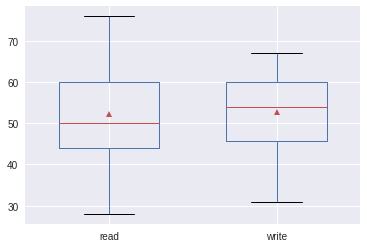

In [ ]:
scores[['read', 'write']].boxplot(showmeans = True,
                                  widths = 0.6)
plt.show()

We can assume that the variables are **dependent** because each pair of observations come from the student.

*EXERCISE: Make a scatterplot for these two variables to see what kind of relation can you detect*

Since they are dependent, we must generate the matches pairs, i.e. the difference variable

In [ ]:
scores['diff_rw'] = scores['read'] - scores['write']
scores.head(5)

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst,diff_rw
0,70,male,white,low,public,general,57,52,41,47,57,5
1,121,female,white,middle,public,vocational,68,59,53,63,61,9
2,86,male,white,high,public,general,44,33,54,58,31,11
3,141,male,white,high,public,vocational,63,44,47,53,56,19
4,172,male,white,middle,public,academic,47,52,57,53,61,-5


In [ ]:
scores['schtyp'].unique()

array(['public', 'private'], dtype=object)

The decision scheme that allow us to determine if there is a significant difference between the grades in both exams is

\begin{equation}
H_0:\{\bar D = 0\},\quad H_1:\{\bar D \neq 0\}
\end{equation}

then let's perform the test for a 1% of significance level

In [ ]:
# data
SL = 0.01
mu0 = 0

# using statsmodels
des = smw.DescrStatsW(scores['diff_rw'])
tstat, pval, dof = des.ttest_mean(value = mu0,
                                  alternative = 'two-sided')

# print the output
print('tStat: {:4.3f}\npval: {:6.3f}\nalpha: {:5.3f}'.format(tstat, pval, SL))
if pval < SL:
  print('\nReject H0')
else:
  print('\nFail to Reject H0')

tStat: -0.867
pval:  0.387
alpha: 0.010

Fail to Reject H0


We do not find evidence against the NULL hypothesis, then for a 1% of significance level we do not find a significant difference between the grades of the reading and writing exams.

Let's find the confidence interval to see if we obtain the same information

In [ ]:
lower, upper = des.tconfint_mean(alpha = SL)

# print the output
print('The {:2.0%} CI for the average difference in the scores is [{:1.2f}, {:1.2f}]'.format(1 - SL, lower, upper))

The 99% CI for the average difference in the scores is [-2.18, 1.09]


Since the confidence interval contains the value 0, we are 99% confident that there is no significant difference between both average scores.

### <font color = "Red"> Math-by-gender Score </font>

**let's now test if there is a significant difference in the average score in Math between males and females for a 1% of significance level**

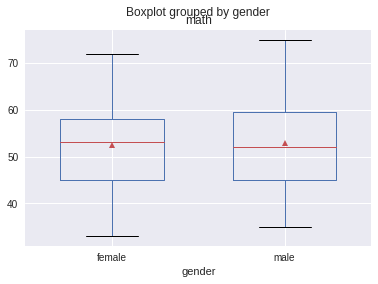

In [ ]:
scores.boxplot(column = 'math',
               by = 'gender',
               showmeans = True,
               widths = 0.6)
plt.show()

to perform the test we are going to use the `ttest_ind` function of statstmodels

In [ ]:
# significance level
SL = 0.01

# test value
diff = 0

# performing the test
tstat, pval, dof = smw.ttest_ind(scores[scores['gender'] == 'female'].math,
                                 scores[scores['gender'] == 'male'].math,
                                 usevar = 'pooled',
                                 value = diff)

# print the output
print('tStat: {:4.3f}\npval: {:6.3f}\nalpha: {:5.3f}'.format(tstat, pval, SL))
if pval < SL:
  print('\nReject H0')
else:
  print('\nFail to Reject H0')

tStat: -0.413
pval:  0.680
alpha: 0.010

Fail to Reject H0


To find the confidence interval we follow the following formula

\begin{equation}
\mu_x - \mu_y \in \bar x - \bar y\pm t_{n_x+n_y-2, \alpha/2}\cdot s_p\cdot \sqrt{\frac{1}{n_x} + \frac{1}{n_y}}
\end{equation}

where the pooled sample variance is found from

\begin{equation}
s_p^2=\frac{(n_x-1)s_x^2 + (n_y-1)s_y^2}{n_x+n_y-2}
\end{equation}

\begin{equation}
t_{\rm stats} = \frac{\bar x-\bar y}{s_p\,\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}}
\end{equation}


In [ ]:
# datasets
math_fem = scores[scores['gender'] == 'female'].math
math_mal = scores[scores['gender'] == 'male'].math

# females
fem_mean = math_fem.mean()
fem_std = math_fem.std()
fem_n = len(math_fem)

# males
mal_mean = math_mal.mean()
mal_std = math_mal.std()
mal_n = len(math_mal)

# pooled sample variance
sp_var = ((fem_n - 1)*(fem_std**2) + (mal_n - 1)*(mal_std**2))/(fem_n + mal_n - 2)
sp_std = np.sqrt(sp_var)

# t-value
tval = ss.t.isf(SL/2, fem_n + mal_n - 2)

# Margin of Error
ME = tval * sp_std * np.sqrt(1/fem_n + 1/mal_n)

# Boundaries of the CI
diff = fem_mean - mal_mean
lower = diff - ME
upper = diff + ME

# print the output
print('The {:2.0%} CI for the difference in the scores of males and females is [{:1.2f}, {:1.2f}]'.format(1 - SL, lower, upper))

The 99% CI for the difference in the scores of males and females is [-4.02, 2.92]


Since the CI contains the 0, we are 99% confident that there is no significant difference between the grades of males and females in the math exam.

Let's now find the confidence interval using `statsmodels`

In [ ]:
# Find the descriptive stats in statsmodels
dfem = smw.DescrStatsW(math_fem)
dmale = smw.DescrStatsW(math_mal)

# Find the comparison of means in statsmodels
comp = smw.CompareMeans(dfem, dmale)

# Find the boundaries of the CI
lower, upper = comp.tconfint_diff(alpha = SL,         # by default it is a 5%
                                  usevar = 'pooled') # by default assumes equal vars

# print the output
print('The {:2.0%} CI for the difference in the scores of males and females is [{:1.2f}, {:1.2f}]'.format(1 - SL, lower, upper))

The 99% CI for the difference in the scores of males and females is [-4.02, 2.92]


**Consider the variable `science`, then perform the test for the equality of means and find the confidence interval for a 98% CL with respect to `gender` in the case of unkown variances not assumed to be equal**

Let's first perform the test

In [ ]:
# Dataset
fem_science = scores[scores['gender'] == 'female'].science
mal_science = scores[scores['gender'] == 'male'].science

# significance level
SL = 0.02

# test value
diff = 0

# performing the test
tstat, pval, dof = smw.ttest_ind(fem_science,
                                 mal_science,
                                 usevar = 'unequal',
                                 value = diff)

# print the output
print('tStat: {:4.3f}\npval: {:6.3f}\nalpha: {:5.3f}'.format(tstat, pval, SL))
if pval < SL:
  print('\nReject H0')
else:
  print('\nFail to Reject H0')

tStat: -1.785
pval:  0.076
alpha: 0.020

Fail to Reject H0


Let's find the confidence interval using `statsmodels`

In [ ]:
# Find the descriptive stats in statsmodels
dfem = smw.DescrStatsW(fem_science)
dmale = smw.DescrStatsW(mal_science)

# Find the comparison of means in statsmodels
comp = smw.CompareMeans(dfem, dmale)

# Find the boundaries of the CI
lower, upper = comp.tconfint_diff(alpha = SL,         # by default it is a 5%
                                  usevar = 'unequal') # by default assumes equal vars

# print the output
print('The {:2.0%} CI for the difference in the scores of males and females is [{:1.2f}, {:1.2f}]'.format(1 - SL, lower, upper))

The 98% CI for the difference in the scores of males and females is [-5.87, 0.80]


The conclusion is that, since the interval contains the value 0, we are 98% confident that there is no significant difference between the scores of females and males in the science exams

Let's now use the formula

\begin{equation}
\mu_x-\mu_y \in \bar x-\bar y\pm t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}
\end{equation}

where

\begin{equation}
\nu = \frac{\left[\left(\frac{s_x^2}{n_x}\right) + \left(\frac{s_y^2}{n_y}\right)\right]^2}{\frac{\left(\frac{s_x^2}{n_x}\right)^2}{n_x-1} + \frac{\left(\frac{s_y^2}{n_y}\right)^2}{n_y-1}}
\end{equation}

\begin{equation}
t_{\rm stats} = \frac{\bar x-\bar y}{\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}}
\end{equation}


In [ ]:
# Sample information

# females
f_mean = fem_science.mean()
f_std = fem_science.std()
f_n = len(fem_science)

# males
m_mean = mal_science.mean()
m_std = mal_science.std()
m_n = len(mal_science)

# degrees of freedom
nu = (f_std**2/f_n + m_std**2/m_n)**2/((f_std**2/f_n)**2/(f_n - 1) + (m_std**2/m_n)**2/(m_n -1))

# t-value
tval = ss.t.isf(SL/2, nu)

# Margin of Error
ME = tval * np.sqrt(f_std**2/f_n + m_std**2/m_n)

# Difference in sample means
diff = f_mean - m_mean

# Boundaries of the CI
lower = diff - ME
upper = diff + ME

# print the output
print('The {:2.0%} CI for the difference in the scores of males and females is [{:1.2f}, {:1.2f}]'.format(1 - SL, lower, upper))

The 98% CI for the difference in the scores of males and females is [-5.87, 0.80]


# <font color = "Blue"> Gifted Children </font>



In [ ]:
gifted = pd.read_csv('/content/mydrive/My Drive/IE - Statistics and Data Analysis - DUAL - 2019/DataSets/gifted.csv')
gifted.head()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50


**Let's perform a test on the equality of Mothers and Fathers IQ, for a 5% of significance level** 

This should be read as: "we want to test if their IQs are different", so it is a2-tailed test. The decision scheme

\begin{equation}
H_0:\{\mu_m = \mu_f\},\quad H_1:\{\mu_m \neq \mu_f\}
\end{equation}

Now, the populations are **independent** because they belong to different people.

Let's make a graphical analysis to understand the output we should have


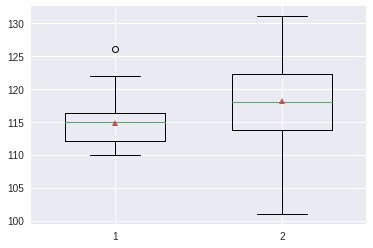

In [ ]:
plt.boxplot([gifted['fatheriq'],
             gifted['motheriq']],
            showmeans = True,
            widths = 0.6)

plt.show()

From these graphs we see that:
 * both distributions are rather symmetric (mean is approximatedly the median)
 * The distribution of the IQs of the mothers has ahigher variability
 * The sample mean of the fathers IQ is around 115 while that of the mothers is around 118, so we may see a significant difference once we perform the test

We have:

 * Two independent population
 * Unkown population variances
 * We are not going to assume equality of variances

In [ ]:
# significance level
SL = 0.05

# Test values
tstat, pval, dof = smw.ttest_ind(gifted['fatheriq'],
                                 gifted['motheriq'],
                                 usevar = 'unequal')

#Test
if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nReject H0'.format(tstat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nFail to Reject H0'.format(tstat, pval, SL))

tStat: -2.756
pval: 0.008
alpha: 0.050

Reject H0


Since we reject the NULL hypothesis, we conclude that, for a 5% of significance level, there is evidence against the equality of average IQs of mothers and fathers.

Let's find the confidence interval to determine more easily which is higher

In [ ]:
# Descriptive Statistics
des_fa = smw.DescrStatsW(gifted['fatheriq'])
des_mo = smw.DescrStatsW(gifted['motheriq'])

# Now we have to find the descriptive statistics for the comparison
des_comp = smw.CompareMeans(des_fa, des_mo)

# Boundaries
lower, upper = des_comp.tconfint_diff(SL, usevar = 'unequal')

# Confidence Interval
print('\nThe {:2.0%} CI for the difference in the IQ of fathers and mothers is [{:4.3f}, {:4.3f}]'.format(1-SL, lower, upper))


The 95% CI for the difference in the IQ of fathers and mothers is [-5.855, -0.923]


Since both values of the boundaries of the confidence interval for the difference in the IQ of mothers and fathers are negative, we conclude that we are 95% confident that the average IQ of the mothers of gifted children is significantly greater than that of the fathers.